In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [32]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [33]:
df.iloc[1,:]

class                       e
cap-shape                   x
cap-surface                 s
cap-color                   y
bruises                     t
odor                        a
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  k
stalk-shape                 e
stalk-root                  c
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           n
population                  n
habitat                     g
Name: 1, dtype: object

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df["stalk-root"].replace("?","r",inplace=True)


In [5]:
df["stalk-root"].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.shape

(8124, 23)

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
print(df.shape)
df.drop_duplicates().shape

(8124, 23)


(8124, 23)

# Exploratory data analysis

<AxesSubplot:title={'center':'cap Surface'}, xlabel='cap-surface', ylabel='count'>

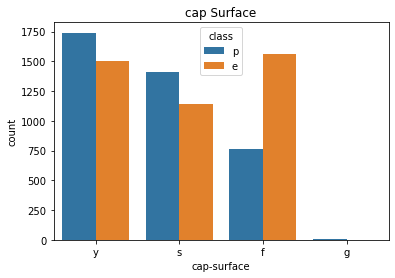

In [10]:
figsize=(15,8)

plt.title('cap Surface')
sns.countplot(data = df, x='cap-surface',hue='class', order=df['cap-surface'].value_counts().index)

<AxesSubplot:title={'center':'cap shape'}, xlabel='cap-shape', ylabel='count'>

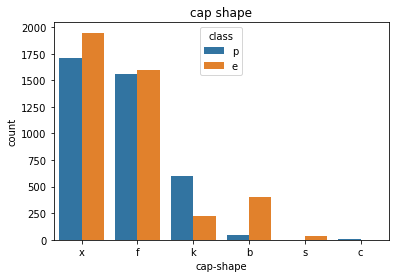

In [11]:
plt.title('cap shape')
sns.countplot(data = df, x='cap-shape',hue='class', order=df['cap-shape'].value_counts().index)

<AxesSubplot:title={'center':'cap-color effect'}, xlabel='cap-color', ylabel='count'>

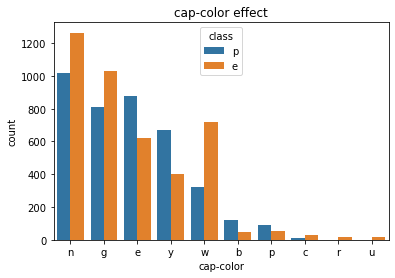

In [12]:
plt.title('cap-color effect')
sns.countplot(data = df, x='cap-color',hue='class', order=df['cap-color'].value_counts().index,)

In [13]:
for i in df.columns:
    df[i]=LabelEncoder().fit_transform(df[i])

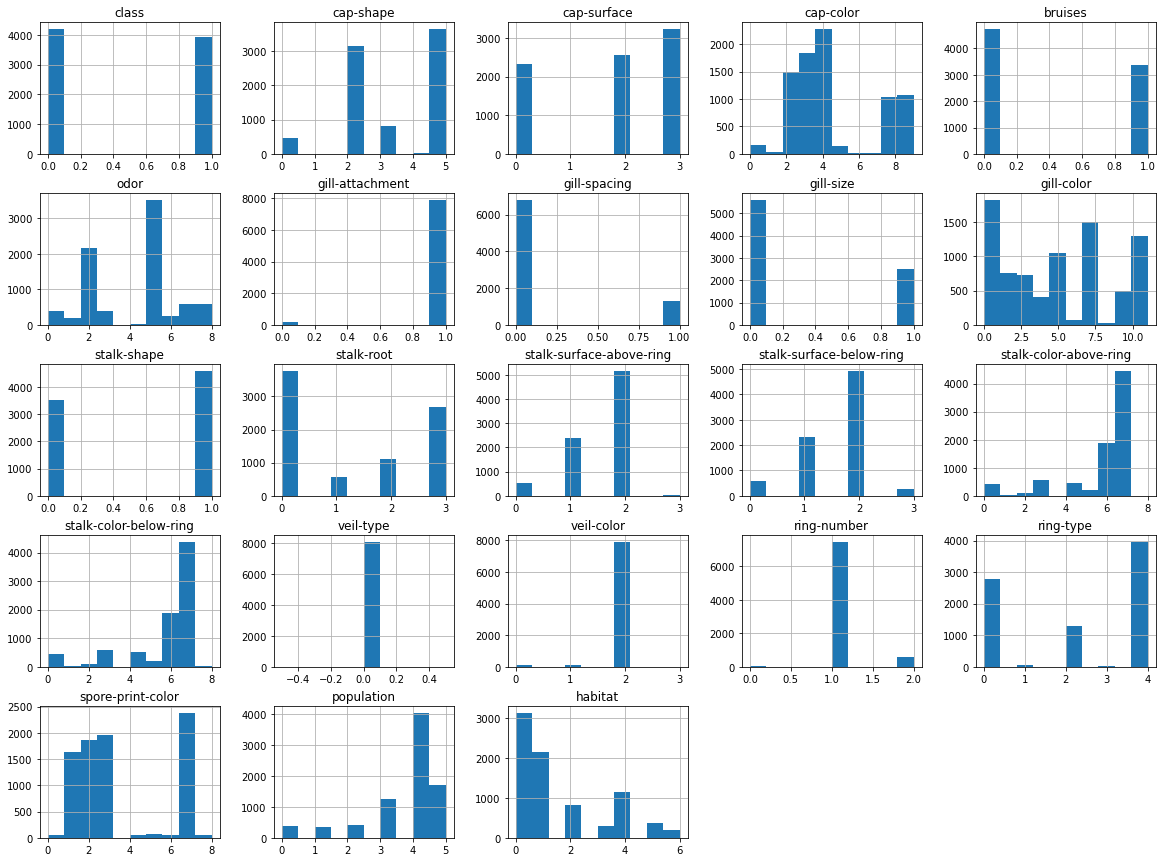

In [14]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

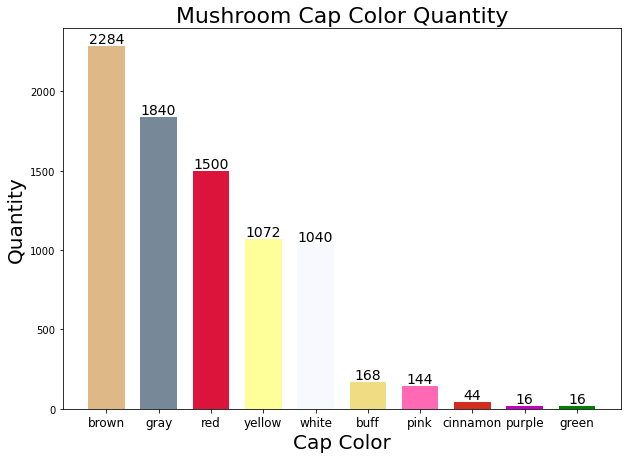

In [15]:
cap_colors = df['cap-color'].value_counts()
m_height = cap_colors.values.tolist() 
cap_colors.axes 
cap_color_labels = cap_colors.axes[0].tolist() 


ind = np.arange(10) 
width = 0.7        
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']

fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() 


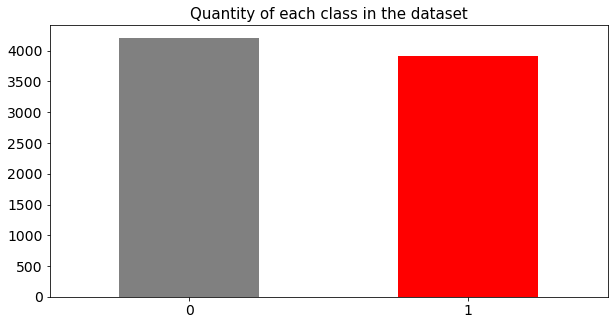

In [16]:
df['class'].value_counts().plot.bar(figsize = (10,5), color = ['grey','red'])
plt.xticks(rotation=0)
plt.title('Quantity of each class in the dataset', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

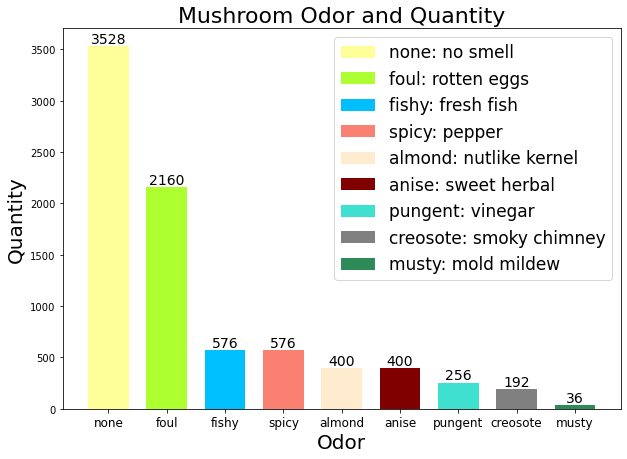

In [17]:
odors = df['odor'].value_counts()
odor_height = odors.values.tolist() 
odor_labels = odors.axes[0].tolist()

width = 0.7 
ind = np.arange(9)  
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)


ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) 
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show() 

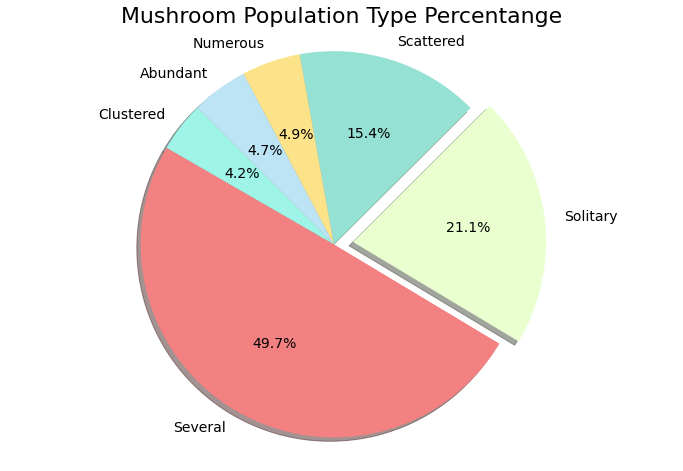

In [18]:
populations = df['population'].value_counts()
pop_size = populations.values.tolist() 
pop_types = populations.axes[0].tolist()
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

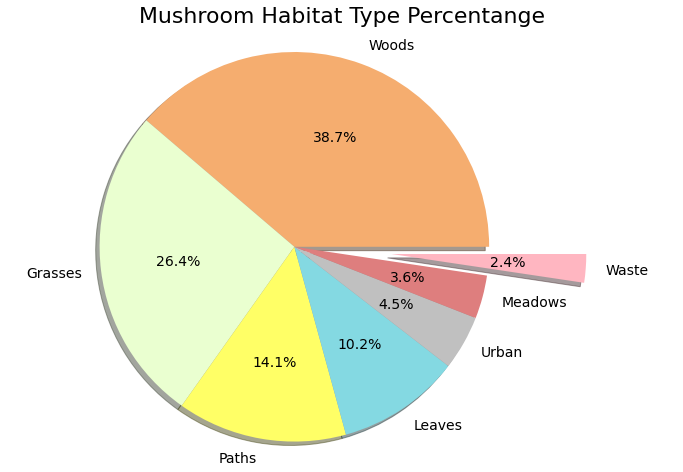

In [19]:
habitats = df['habitat'].value_counts()
hab_size = habitats.values.tolist() 
hab_types = habitats.axes[0].tolist()

hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)  
fig = plt.figure(figsize=(12,8))
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

# MODELS

In [20]:
x=df.drop("class",axis=1)
y=df["class"]

In [21]:
SelectKBest(chi2,k=15).fit(x,y).get_support()

array([False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True])

In [22]:
col=SelectKBest(chi2,k=18).fit(x,y).get_support()

In [23]:
x.columns[col]

Index(['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [24]:
model={
       "LogisticRegression":LogisticRegression(),"RandomForestClassifier":RandomForestClassifier(),
       "DecisionTreeClassifier":DecisionTreeClassifier(),"SVC":SVC(),"KNeighborsClassifier":KNeighborsClassifier(),
       "SGDClassifier":SGDClassifier(),"GaussianNB":GaussianNB()
        }    

In [25]:
name_=[]
score_=[]
accuracy_=[]
for name,model in model.items():
    mod=model.fit(df[x.columns[col]],y)
    name_.append(name)
    score_.append(mod.score(df[x.columns[col]],y))
    y_pred=mod.predict(df[x.columns[col]])
    accuracy_.append(accuracy_score(y_pred,y))
    print(confusion_matrix(y_pred,y))
pd.DataFrame({"NAME":name_,"SCORE":score_,"ACCURACY":accuracy_})

[[4066  166]
 [ 142 3750]]
[[4208    0]
 [   0 3916]]
[[4208    0]
 [   0 3916]]
[[4198    3]
 [  10 3913]]
[[4200    0]
 [   8 3916]]
[[3911   92]
 [ 297 3824]]
[[4010  481]
 [ 198 3435]]


,NAME,SCORE,ACCURACY
0,LogisticRegression,0.962088,0.962088
1,RandomForestClassifier,1.000000,1.000000
2,DecisionTreeClassifier,1.000000,1.000000
3,SVC,0.998400,0.998400
4,KNeighborsClassifier,0.999015,0.999015
5,SGDClassifier,0.952117,0.952117
6,GaussianNB,0.916420,0.916420


In [26]:
param={"n_neighbors":[i for i in range(10)],"weights":['uniform', 'distance']}

score 1.0
1.0
[[4208    0]
 [   0 3916]]


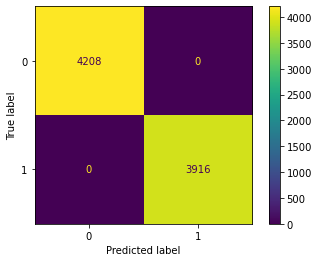

In [27]:
from sklearn.metrics import plot_confusion_matrix
grid=GridSearchCV(KNeighborsClassifier(),param,cv=2)
grid=grid.fit(df[x.columns[col]],y)
print("score",grid.score(df[x.columns[col]],y))
y_pred=grid.predict(df[x.columns[col]])
print(accuracy_score(y_pred,y))
print(confusion_matrix(y_pred,y))
plot_confusion_matrix(grid,df[x.columns[col]],y)

In this model True Positive,True Negative is high and False Positive ,False Negative become zero
so the model does not predict the poision mushroom as eatable

other well performing models are random forest classifier,decision tree classifier

In [29]:
import pickle
with open("mushroom_model.pkl","wb")as file:
    pickle.dump(grid,file)

In [6]:
mod=['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
for i in mod:
    print(i)
    print(df[i].unique())
    print(pd.Series(LabelEncoder().fit_transform(df[i])).unique())

cap-shape
['x' 'b' 's' 'f' 'k' 'c']
[5 0 4 2 3 1]
cap-surface
['s' 'y' 'f' 'g']
[2 3 0 1]
bruises
['t' 'f']
[1 0]
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
[6 0 3 5 2 1 8 7 4]
gill-spacing
['c' 'w']
[0 1]
gill-size
['n' 'b']
[1 0]
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
[ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape
['e' 't']
[0 1]
stalk-root
['e' 'c' 'b' 'r']
[2 1 0 3]
stalk-surface-above-ring
['s' 'f' 'k' 'y']
[2 0 1 3]
stalk-surface-below-ring
['s' 'f' 'y' 'k']
[2 0 3 1]
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
[7 3 6 4 0 2 5 1 8]
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
[7 6 3 0 4 2 8 5 1]
ring-number
['o' 't' 'n']
[1 2 0]
ring-type
['p' 'e' 'l' 'f' 'n']
[4 0 2 1 3]
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
[2 3 6 1 7 5 4 8 0]
population
['s' 'n' 'a' 'v' 'y' 'c']
[3 2 0 4 5 1]
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']
[5 1 3 0 4 6 2]


In [30]:
y


0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32